In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import sys
print(sys.executable)

c:\Users\ido\AppData\Local\Programs\Python\Python37\python.exe


In [10]:
#Load the data
X, y = load_digits(return_X_y= True)

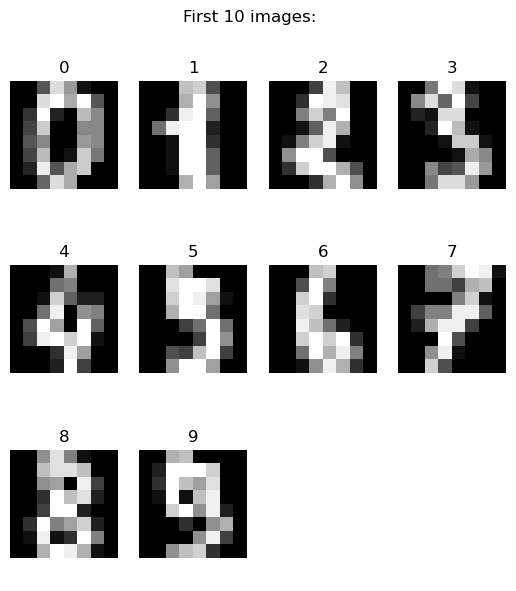

In [11]:
#Plot first 10 images
fig, axs = plt.subplots(3, 4)
fig.suptitle('First 10 images:', y=1.3)
plt.subplots_adjust(top=1.2)
axs = axs.flatten()
for i in range(10):
    img=X[i].reshape((8,8))
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(y[i])
    axs[i].axis('off')
for i in range(10,12):
    axs[i].axis('off')
    

In [12]:
#Info about labels and features
labels, examples_each_label = np.unique(y, return_counts=True)
features, counts_each_feature = np.unique(X, return_counts=True)
features_to_print_nice = ", ".join(str(feature) for feature in features.astype(int))
labels_to_print_nice = ", ".join(str(label) for label in labels.astype(int))
print(f"There are {X.shape[0]} samples")
print(f"every sample has {X.shape[1]} features\n")
print(f"There are {len(labels)} possible labels:\n {labels_to_print_nice}")
print(f"There are {len(features)} possible values for each feature:\n {features_to_print_nice}")

There are 1797 samples
every sample has 64 features

There are 10 possible labels:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
There are 17 possible values for each feature:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16


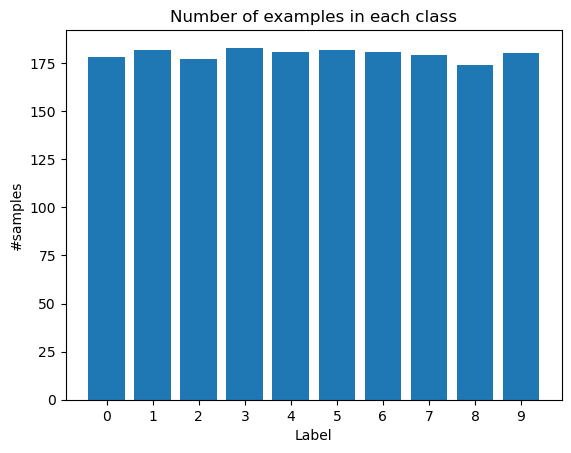

In [13]:
# Number of examples in each class
plt.bar(labels, examples_each_label)
plt.xlabel('Label')
plt.xticks(np.arange(10))
plt.ylabel('#samples')
plt.title('Number of examples in each class')
plt.show()

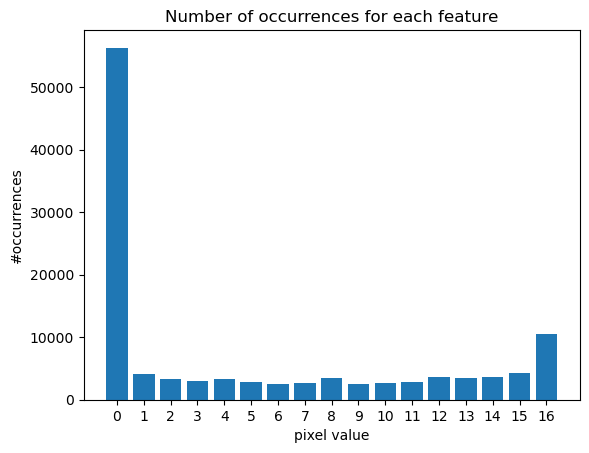

In [14]:
# Number of occurrences for each feature
plt.bar(features, counts_each_feature)
plt.xlabel('pixel value')
plt.xticks(np.arange(17))
plt.ylabel('#occurrences')
plt.title('Number of occurrences for each feature')
plt.show()

In [16]:
#calculate accuracy for each r using the full the dataset
def accuracies_calculator(X, y):
    '''
    Given a dataset, split it into train-set and test-set 10 times 
    and return a list of accuracies for each split 
    '''
    accuracies = []
    ratios = np.arange(start=0.1, stop=1, step=0.1)
    for r in ratios:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r)
        #Scale the data:
        scaler = StandardScaler() 
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        clf = LogisticRegression(max_iter=150) #Create the model
        clf.fit(X_train,y_train) #Train the model
        accuracy = clf.score(X_test, y_test) #Calculate the accuracy
        accuracies.append(accuracy)
    return accuracies

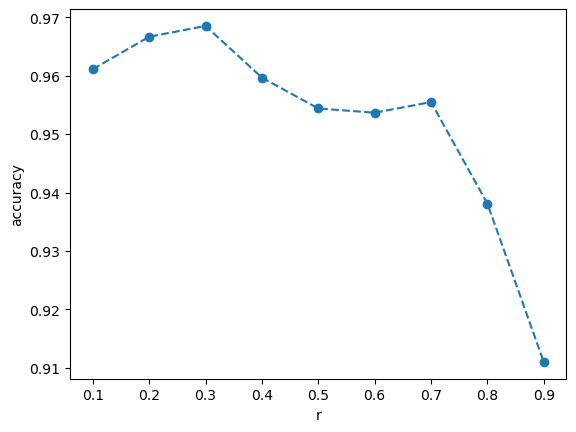

In [24]:
# Plot the accuracy for the full dataset
accuracies = accuracies_calculator(X, y)
ratios = np.arange(start=0.1, stop=1, step=0.1)
plt.plot(ratios, accuracies, '--o')
plt.xlabel('r')
plt.ylabel('accuracy')
plt.show()

In [26]:
#Unbalance the dataset:
def unbalance(X,y):

    samples_from_each_class = [92]*10
    samples_from_each_class[random.randint(0,10)] = 172 

    # class_indices[i] are all the indices of digit i
    class_indices = [np.where(y == label)[0] for label in np.unique(y)]

    # Choose randomly indices to generate new unbalance dataset
    sub_dataset_indices = [np.random.choice(sublist, size, replace=False) for sublist, size in
                           zip(class_indices, samples_from_each_class)]

    # Create the new dataset by taking the relevant
    # indices from the original dataset,
    X_subset = [X[sub_dataset_index] for sub_dataset_index in sub_dataset_indices]
    y_subset = [y[sub_dataset_index] for sub_dataset_index in sub_dataset_indices]
    X_subset = np.concatenate(X_subset, axis=0)
    y_subset = np.concatenate(y_subset, axis=0)
    return X_subset, y_subset

In [10]:
#Balance the dataset:
def balancing(X,y):
    unique_vals, counts = np.unique(y, return_counts=True)
    lmin = np.min(counts)
    #class_indices[i] are all the indices of digit i
    class_indices = [np.where(y == label)[0] for label in np.unique(y)]
    sub_dataset_balanced_indices = [np.random.choice(sublist, lmin, replace=False) for sublist in class_indices]

    # Create the new dataset by taking the relevant
    # indices from the original dataset
    X_balanced_subset = [X[sub_dataset_index] for sub_dataset_index in sub_dataset_balanced_indices]
    y_balanced_subset = [y[sub_dataset_index] for sub_dataset_index in sub_dataset_balanced_indices]
    X_balanced_subset = np.concatenate(X_balanced_subset, axis=0)
    y_balanced_subset = np.concatenate(y_balanced_subset, axis=0)
    return X_balanced_subset, y_balanced_subset

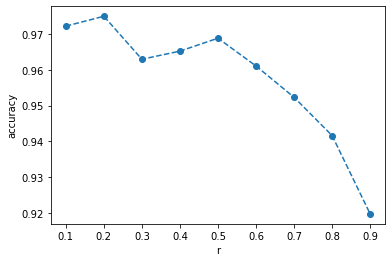

In [11]:
X_unbalance, y_unbalance = unbalance(X,y) #create the unbalanced dataset
new_X, new_y = balancing(X_unbalance, y_unbalance) #balance the dataset
# Plot the accuracy for the new dataset
accuracies = accuracies_calculator(X, y)
plt.plot(ratios, accuracies, '--o')
plt.xlabel('r')
plt.ylabel('accuracy')
plt.show()

In [12]:
def naive_k_features(train_set, test_set, k):
    
    '''
    Given a train-set a test-set, and a number k, 
    returns the best k features from the dataset and the accuracy achieved on
    the test-set
    '''
    feature_combinations = itertools.combinations(iterable=
                                                np.arange(train_set[0].shape[1]), r=k)
    best_features = None
    best_acc = 0.0
    X_train, y_train, = train_set
    X_test, y_test = test_set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    for combination in feature_combinations:
        k_X_train = X_train[:, combination]
        k_X_test = X_test[:, combination]
        clf = LogisticRegression(max_iter=400)
        clf.fit(k_X_train, y_train)
        acc = clf.score(k_X_test, y_test)
        if acc > best_acc:
            best_features = combination
            best_acc = acc
    return best_features, best_acc


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_set = (X_train, y_train)
test_set = (X_test, y_test)
# Call the function with the original dataset
best_k_indices, score = naive_k_features(train_set, test_set, 2)
print(f"The best k features are: {best_k_indices}\nWith score: {score}")

The best k features are: (21, 42)
With score: 0.4203703703703704
